In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

## Input folder
The structure of the input folder must be:
    
    ROOT    
    ----- homogeneus blue experiment folder
    ----- homogeneus red experiment folder
    ----- mixed experiment folder

In [4]:
results_folder = os.path.join(os.getcwd(), "results")

In [5]:
if not os.path.isdir(results_folder):
    print(colored("Error, results_folder does not exist", 'red'))
else:
    print(colored("OK, results_folder exists", 'green'))

OK, results_folder exists


## Load data in a nested (sorted) dict
The nested dict has the following structure:
<br>exp_type = 'blue', 'red', 'mixed'
<br>timeout = 30, 90, 150,...
<br>completed_areas_array = np array containing completed areas of 100 different runs for a single set-up

    exp_dict = { exp_type : { timeout : completed_areas_array }}

In [6]:
exp_dict = {}

for experiment in sorted(os.listdir(results_folder)):
    print(colored("Experiment: " + experiment, 'green'))
    exp_dict[experiment] = {}
    timeout=-1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folder, experiment))):
        print(colored("\tTimeout folder:", 'blue'),timeout_folder)
        parameters = timeout_folder.split("_")
        
#         print("parameters[0]",parameters[0])
            
        for param in parameters:
            if param.startswith("timeout"):
                timeout = int(param.split("#")[-1]) * 10
#                 print("\ttimeout:",timeout*10)
                
        if timeout == -1:
            print(colored("\tWARNING: wrong timeout folder", 'green'))
            continue
            
        exp_dict[experiment][timeout] = {}
        completed_areas = np.array([])
        for filename in os.listdir(os.path.join(results_folder, experiment, timeout_folder)):
            if filename.endswith("taskLOG_client.tsv"):
#                 print("\t\tFilename:",filename)
                if not os.path.getsize(os.path.join(results_folder, experiment, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    completed_areas = np.append(completed_areas, 0)
                    continue
                
#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
                df = pd.read_csv(os.path.join(results_folder, experiment, timeout_folder, filename), sep="\t", header=None)
                completed_areas = np.append(completed_areas, df.shape[0])
        
        exp_dict[experiment][timeout] = completed_areas
#         print("exp_dict:",exp_dict)

Experiment: homogeneous_blue_exp
	Timeout folder: blue_2021-04-26_robots#12_timeout#3_redAreas#0_1800seconds
	Timeout folder: blue_2021-04-26_robots#12_timeout#9_redAreas#0_1800seconds
	Timeout folder: blue_2021-04-26_robots#12_timeout#15_redAreas#0_1800seconds
	Timeout folder: blue_2021-04-26_robots#12_timeout#30_redAreas#0_1800seconds
	Timeout folder: blue_2021-04-26_robots#12_timeout#60_redAreas#0_1800seconds
	Timeout folder: blue_2021-04-26_robots#12_timeout#90_redAreas#0_1800seconds
	WARNING, empty file at:seed#66_completed_taskLOG_client.tsv
Experiment: homogeneous_red_exp
	Timeout folder: red_2021-04-26_robots#36_timeout#3_redAreas#8_1800seconds
	WARNING, empty file at:seed#81_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#6_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#11_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#66_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#60_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#26_com

	WARNING, empty file at:seed#45_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#68_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#25_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#63_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#80_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#19_completed_taskLOG_client.tsv
	Timeout folder: red_2021-04-26_robots#36_timeout#60_redAreas#8_1800seconds
	WARNING, empty file at:seed#23_completed_taskLOG_client.tsv
	Timeout folder: red_2021-04-26_robots#36_timeout#90_redAreas#8_1800seconds
	WARNING, empty file at:seed#46_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#40_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#32_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#35_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#84_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#57_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#27_completed_taskLOG_clien

	WARNING, empty file at:seed#84_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#27_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#65_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#80_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#62_completed_taskLOG_client.tsv
	Timeout folder: mixed_2021-04-26_robots#24_timeout#90_redAreas#4_1800seconds
	WARNING, empty file at:seed#81_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#6_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#90_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#3_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#5_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#44_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#100_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#54_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#35_completed_taskLOG_client.tsv
	WARNING, empty file at:seed#49_completed_taskLOG_client.tsv
	WARNING,

In [7]:
for key, values in exp_dict.items():
    print(key, '\n', values)

homogeneous_blue_exp 
 {30: array([13.,  7., 11.,  4., 11., 10., 12., 12.,  9., 17.,  9.,  8., 12.,
       12.,  9.,  5., 11.,  9., 10.,  8.,  8.,  8.,  9.,  2., 11.,  7.,
       11.,  4.,  9.,  7., 11.,  6., 14., 10.,  9.,  4.,  8., 13.,  6.,
        9.,  7.,  9.,  6.,  7., 10., 14.,  9., 11.,  9., 16., 10., 10.,
       10., 16.,  9., 11.,  8.,  3.,  7.,  5., 10., 14.,  8., 16.,  9.,
       11., 12., 10.,  9.,  8.,  9., 12., 13.,  6.,  6.,  9., 10.,  8.,
       10.,  7., 11.,  8.,  4.,  9.,  6., 14.,  6., 18.,  4.,  7.,  8.,
        8., 16.,  7., 15., 11.,  9.,  9.,  6.,  4.]), 90: array([21., 28., 17., 20., 24., 22., 23., 22., 24., 26., 14., 17., 22.,
       22., 18., 18., 23., 17., 17., 27., 13., 22., 17., 23., 11., 17.,
       19., 13., 11., 24., 28., 23., 17., 24., 15., 20., 20., 27., 21.,
       20., 26., 11., 19., 13., 27., 25., 18., 12., 25., 16., 16., 20.,
       18., 24., 21., 19., 27., 19., 16., 17., 20., 18., 19., 23., 20.,
       17., 23., 23., 19., 20., 15., 18., 24., 18.

## Box Plots of the 3 different experiment

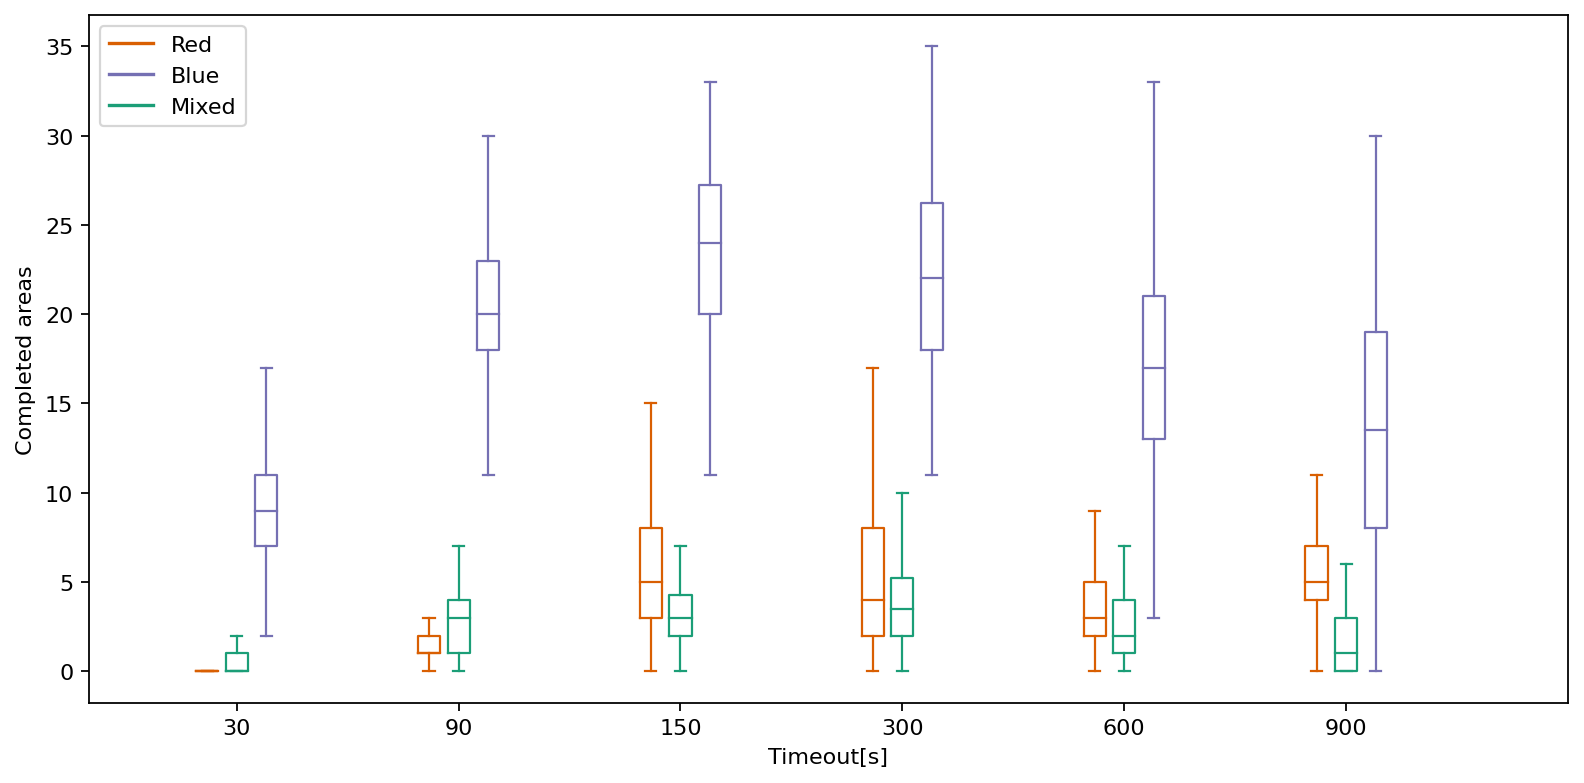

In [16]:
red = exp_dict['homogeneous_red_exp']
blue = exp_dict['homogeneous_blue_exp']
mixed = exp_dict['mixed_exp']

ticks = mixed.keys()

fig, ax = plt.subplots(figsize=(10, 5), dpi=160)

bpl = plt.boxplot(red.values(), positions=np.array(range(len(red.values())))*3.0-0.4, sym='', widths=0.3)
bpr = plt.boxplot(blue.values(), positions=np.array(range(len(blue.values())))*3.0+0.4, sym='', widths=0.3)
bpc = plt.boxplot(mixed.values(), positions=np.array(range(len(mixed.values())))*3.0, sym='', widths=0.3)

set_box_color(bpl, '#d95f02') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#7570b3')
set_box_color(bpc, '#1b9e77')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#d95f02', label='Red')
plt.plot([], c='#7570b3', label='Blue')
plt.plot([], c='#1b9e77', label='Mixed')
plt.legend(loc=2)

# plt.xticks(range(0, 300, 5), ticks)
# plt.xlim(-3, len(ticks)*3)
# plt.ylim(0, 80)
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-2, len(ticks)*3)

ax.set_xticklabels(mixed.keys())
ax.set_xlabel("Timeout[s]")
ax.set_ylabel("Completed areas")

plt.tight_layout()
plt.savefig('boxcompare_3_over_4_robots.png')

In [26]:
# for x in exp_dict.values():
#     print(x, end="\n\n")
    

In [27]:
# for p1,(k,v) in enumerate (exp_dict.values().items()):
#     print('\t\t',p1,k)

In [12]:
len(exp_dict['homogeneous_blue_exp'].items())

6

In [28]:
exp_dict

{'homogeneous_blue_exp': {30: array([13.,  7., 11.,  4., 11., 10., 12., 12.,  9., 17.,  9.,  8., 12.,
         12.,  9.,  5., 11.,  9., 10.,  8.,  8.,  8.,  9.,  2., 11.,  7.,
         11.,  4.,  9.,  7., 11.,  6., 14., 10.,  9.,  4.,  8., 13.,  6.,
          9.,  7.,  9.,  6.,  7., 10., 14.,  9., 11.,  9., 16., 10., 10.,
         10., 16.,  9., 11.,  8.,  3.,  7.,  5., 10., 14.,  8., 16.,  9.,
         11., 12., 10.,  9.,  8.,  9., 12., 13.,  6.,  6.,  9., 10.,  8.,
         10.,  7., 11.,  8.,  4.,  9.,  6., 14.,  6., 18.,  4.,  7.,  8.,
          8., 16.,  7., 15., 11.,  9.,  9.,  6.,  4.]),
  90: array([21., 28., 17., 20., 24., 22., 23., 22., 24., 26., 14., 17., 22.,
         22., 18., 18., 23., 17., 17., 27., 13., 22., 17., 23., 11., 17.,
         19., 13., 11., 24., 28., 23., 17., 24., 15., 20., 20., 27., 21.,
         20., 26., 11., 19., 13., 27., 25., 18., 12., 25., 16., 16., 20.,
         18., 24., 21., 19., 27., 19., 16., 17., 20., 18., 19., 23., 20.,
         17., 23., 23., 

In [36]:
exp_dict['homogeneous_blue_exp'].keys()

dict_keys([30, 90, 150, 300, 600, 900])

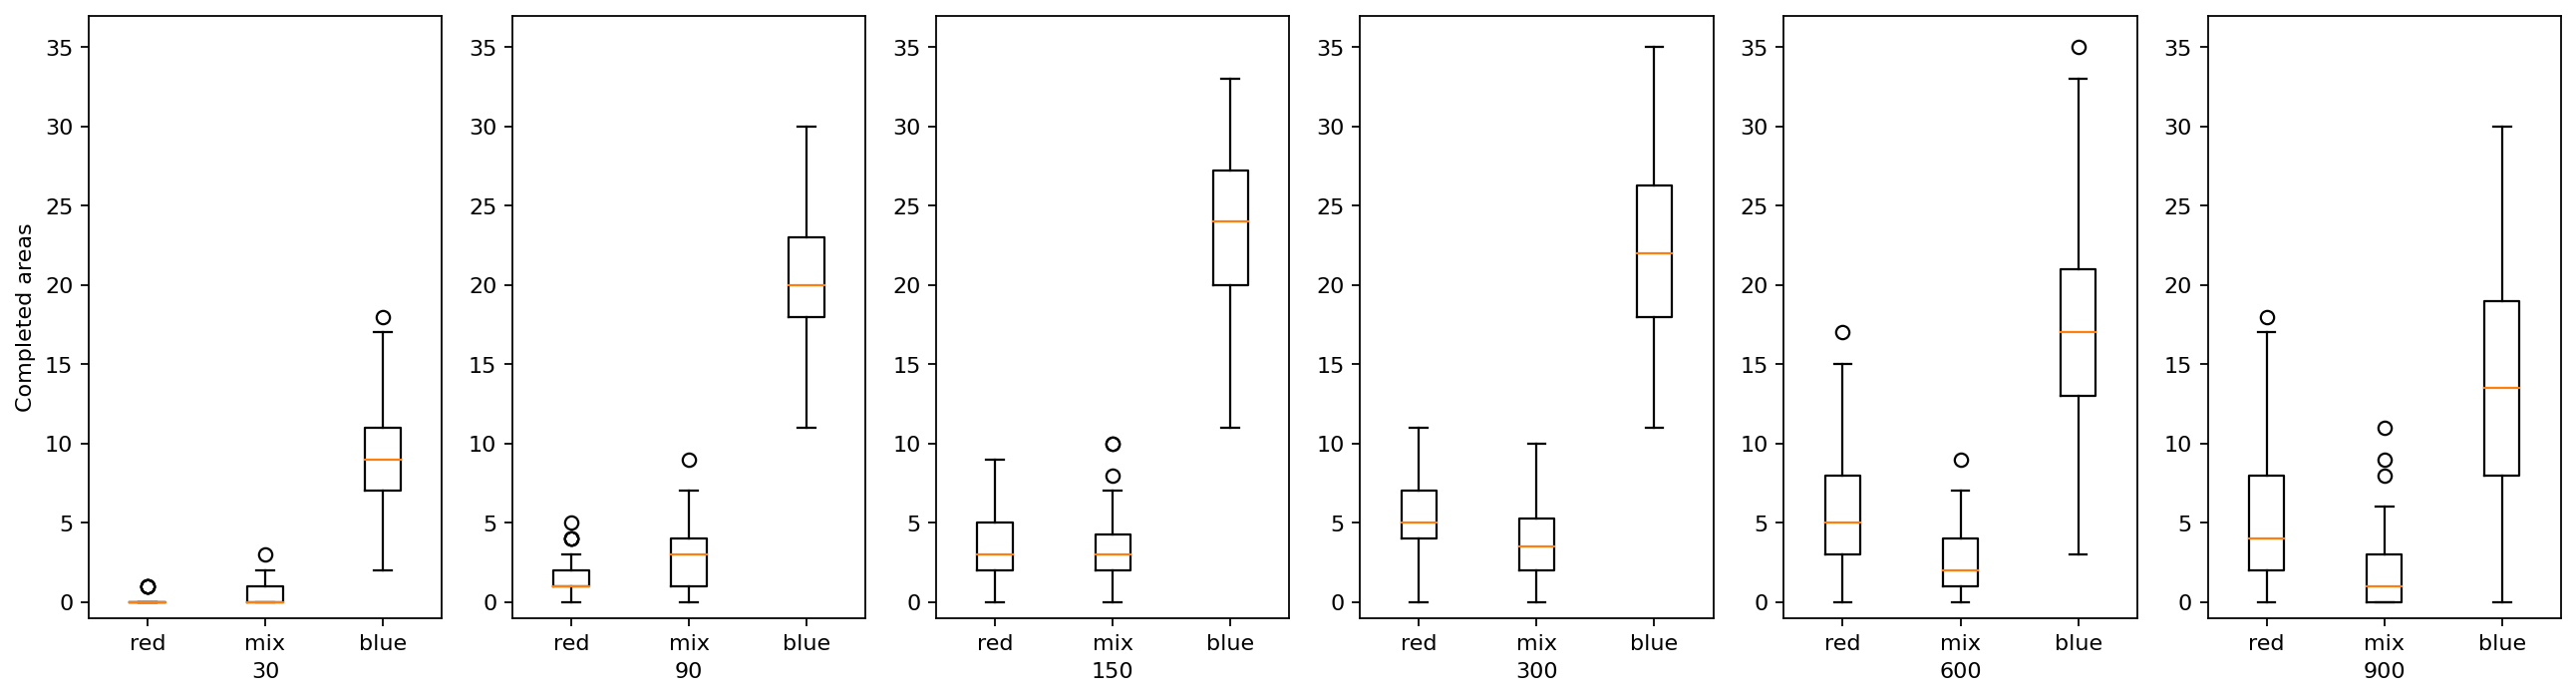

In [44]:
fig, ax = plt.subplots(1, len(exp_dict['homogeneous_blue_exp'].items()),figsize=(20, 5), dpi=160)

ax[0].boxplot([exp_dict['homogeneous_red_exp'][30], exp_dict['mixed_exp'][30], exp_dict['homogeneous_blue_exp'][30]])
ax[0].set_xticklabels(['red', 'mix', 'blue'])
ax[0].set_ylim(-1, 37)
ax[0].set_xlabel("30")
ax[0].set_ylabel("Completed areas")
ax[1].boxplot([exp_dict['homogeneous_red_exp'][90], exp_dict['mixed_exp'][90], exp_dict['homogeneous_blue_exp'][90]])
ax[1].set_xticklabels(['red', 'mix', 'blue'])
ax[1].set_ylim(-1, 37)
ax[1].set_xlabel("90")
ax[2].boxplot([exp_dict['homogeneous_red_exp'][150], exp_dict['mixed_exp'][150], exp_dict['homogeneous_blue_exp'][150]])
ax[2].set_xticklabels(['red', 'mix', 'blue'])
ax[2].set_ylim(-1, 37)
ax[2].set_xlabel("150")
ax[3].boxplot([exp_dict['homogeneous_red_exp'][300], exp_dict['mixed_exp'][300], exp_dict['homogeneous_blue_exp'][300]])
ax[3].set_xticklabels(['red', 'mix', 'blue'])
ax[3].set_ylim(-1, 37)
ax[3].set_xlabel("300")
ax[4].boxplot([exp_dict['homogeneous_red_exp'][600], exp_dict['mixed_exp'][600], exp_dict['homogeneous_blue_exp'][600]])
ax[4].set_xticklabels(['red', 'mix', 'blue'])
ax[4].set_ylim(-1, 37)
ax[4].set_xlabel("600")
ax[5].boxplot([exp_dict['homogeneous_red_exp'][900], exp_dict['mixed_exp'][900], exp_dict['homogeneous_blue_exp'][900]])
ax[5].set_xticklabels(['red', 'mix', 'blue'])
ax[5].set_ylim(-1, 37)
ax[5].set_xlabel("900")
plt.savefig('boxcompare_3_over_4_robots_with_subplots.png')